## THE SPARK FOUNDATION

## AUTHOR: MITHAIWALA ABDEALI MOHAMMADI

## GRADUATE ROTATIONAL INTERNSHIP PROGRAM (GRIPNOV20)

## TASK 3: Prediction using Unsupervised ML (CLUSTERING TECHNIQUE)

## AIM: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [4]:
## Importing Libraries in Python

In [5]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## LOAD THE IRIS DATASET

In [7]:
iris = datasets.load_iris()
df_iris = pd.DataFrame(iris.data,columns = iris.feature_names)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
df_iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [9]:
## Checking if there is any missing value in datasets

In [10]:
df_iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

## Visualizing the Datasets

# 2-D Scatter Plot:

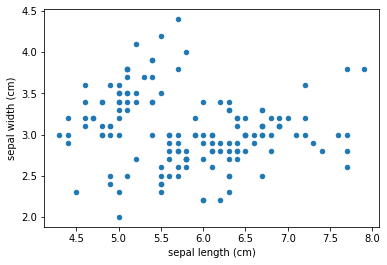

In [11]:
df_iris.plot(kind ='scatter', x ='sepal length (cm)', y ='sepal width (cm)');
plt.show()

## PAIRPLOT:

C:\Users\Humza Ali\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


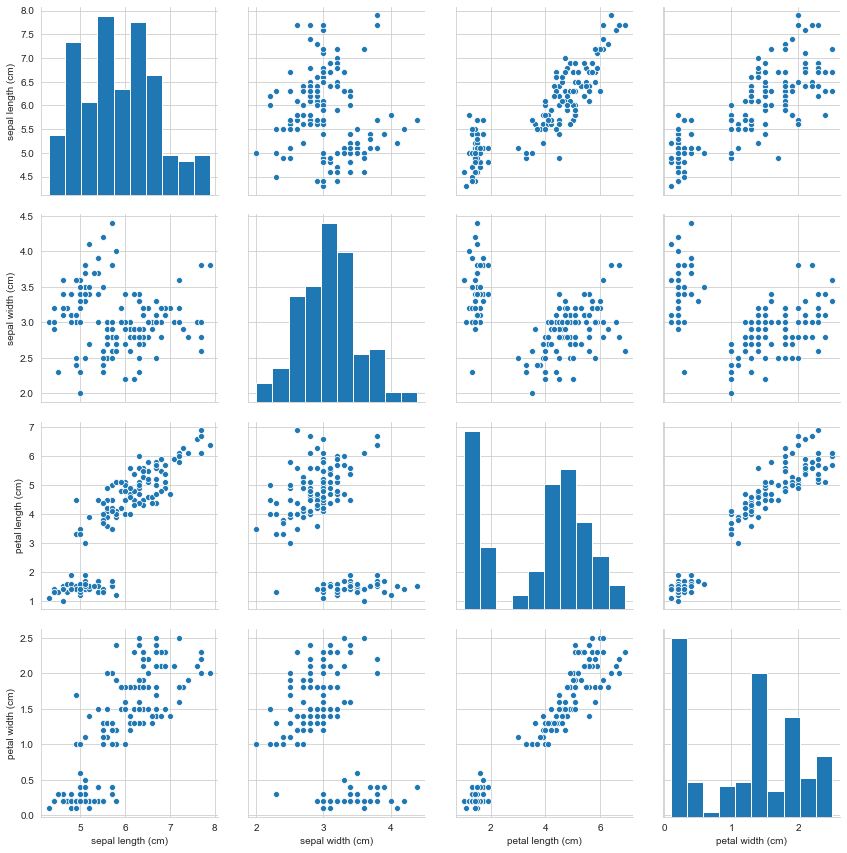

In [13]:
plt.close();
sns.set_style('whitegrid');
sns.pairplot(df_iris, size = 3)
plt.show()

## DISTPLOT:

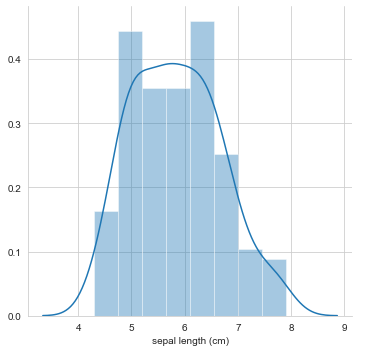

In [15]:
sns.FacetGrid(df_iris, size =5) \
      .map(sns.distplot, "sepal length (cm)") \
     .add_legend();
plt.show();

## 2D Density Plot, Contors-plot

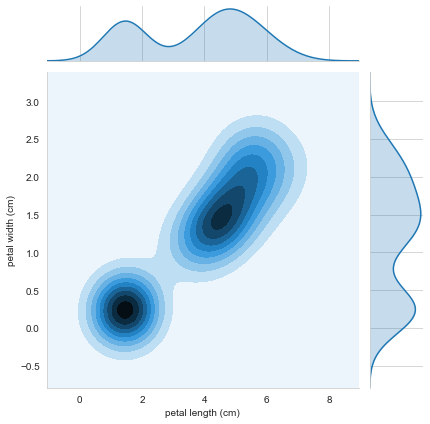

In [16]:
sns.jointplot(x = "petal length (cm)", y = "petal width (cm)", data = df_iris, kind = "kde");
plt.show();

In [17]:
## Finding the optimum number of cluster for K-mean classification
## Importing libraries for Kmeans

from sklearn.cluster import KMeans

In [19]:
x = df_iris.iloc[:, [0,1,2,3]].values

wcss = [] ## (within cluster sum of squares)

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init = 'k-means++',
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [20]:
## Plotting the results into a line graph
## allowing us to observe "The Elbow"

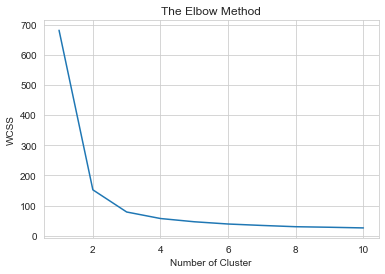

In [21]:
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS")
plt.show()

Note: You You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as 3

In [22]:
## Applying Kmeans to the datasets / Creating the Kmeans classifier

In [24]:
kmeans = KMeans(n_clusters = 3, init = "k-means++",
               max_iter = 300, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(x)

## Visualising the clusters - On the first two columns

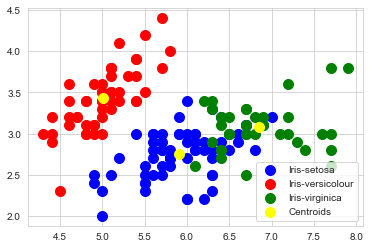

In [25]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

## THANK YOU !!!!